In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import csv

# Import datasets, classifiers and performance metrics
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import distance
from sklearn import manifold

# Dimensionality reduction of robot behavior

In [7]:
import os as os

In [11]:
def stripEmptyLast(row):
    if row[-1]=='':
        row.pop()  
    return row

In [12]:
with open("Sliderwheelie-pimax-env.x.log","rb") as file:
    csvreader = csv.reader(file, delimiter=' ')
    table = [row for row in csvreader]
data = np.asarray([stripEmptyLast(row) for row in table if row[0][0]!="#" ], dtype=np.float)
data.shape

(4590, 19)

In [13]:
with open("Sliderwheelie-pimax-env.v2.log","rb") as file:
    csvreader = csv.reader(file, delimiter=' ')
    table = [row for row in csvreader]
speeds = np.asarray([stripEmptyLast(row) for row in table if row[0][0]!="#" ], dtype=np.float)
speeds.shape

(4590, 3)

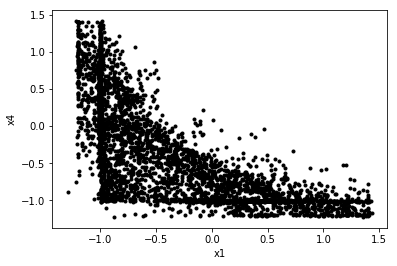

In [14]:
plt.scatter(data[:4000,1],data[:4000,4],marker='.', color='k')
plt.xlabel("x1")
plt.ylabel("x4")

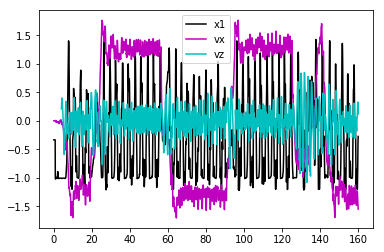

In [15]:
plt.plot(data[:2000,0],data[:2000,1], color='k',label="x1")
plt.plot(speeds[:2000,0],speeds[:2000,1],color='m',label="vx")
plt.plot(speeds[50:2000,0],speeds[50:2000,2],color='c',label="vz")
plt.legend()

In [16]:
X=data[:,1:19]

## PCA

In [17]:
# X is the matrix of observations of shape (dim,N)
# returns eigenvalues(variances) and corresponding eigenvector(PCs) in columns [:,i] in decending order
def PCA(X):
    covmatrix = np.cov(X)
    l,U = np.linalg.eigh(covmatrix)
    return np.flip(l,axis=0),np.flip(U, axis=1)    

In [18]:
l,U = PCA(X.T)

variance in each component

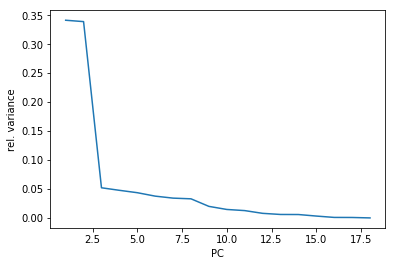

In [19]:
plt.plot(range(1,len(l)+1),l/np.sum(l))
plt.xlabel("PC")
plt.ylabel("rel. variance")

Number of components needed for 80% explained variance

In [23]:
np.sum(np.cumsum(l/np.sum(l))<=0.9)

7

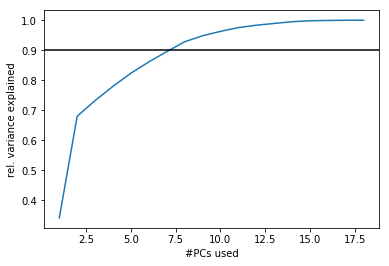

In [25]:
plt.plot(range(1,len(l)+1),np.cumsum(l/np.sum(l)))
plt.axhline(y=0.9, color='k',)
plt.xlabel("#PCs used")
plt.ylabel("rel. variance explained")

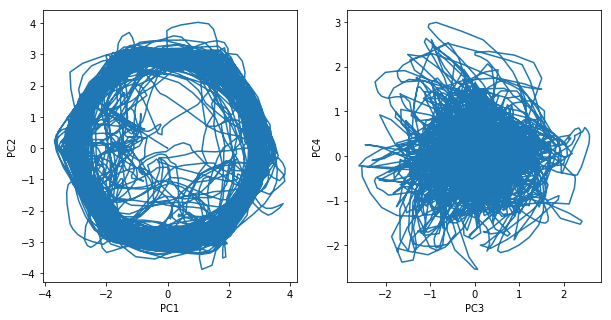

In [26]:
proj = np.dot(X,U)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))
ax1.plot(proj[:,0],proj[:,1])
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax2.plot(proj[:,2],proj[:,3])
ax2.set_xlabel("PC3")
ax2.set_ylabel("PC4")

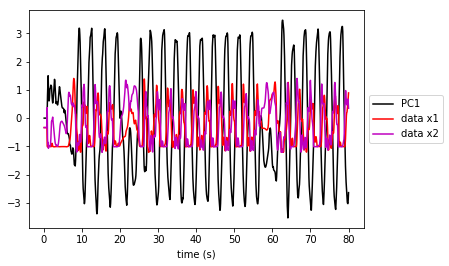

In [31]:
plt.plot(data[:1000,0],proj[:1000,1], color='k',label="PC1")
plt.plot(data[:1000,0],data[:1000,1], color='r',label="data x1")
plt.plot(data[:1000,0],data[:1000,2], color='m',label="data x2")
plt.xlabel("time (s)")
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [36]:
U[:,0]

array([ 0.12768712, -0.1589751 , -0.29628073, -0.14713361,  0.16997756,
        0.29846719,  0.1262456 , -0.15418364, -0.3027709 , -0.14734604,
        0.18211499,  0.30219752,  0.28690927, -0.36758683,  0.0119238 ,
        0.32309248, -0.36258205, -0.00167496])

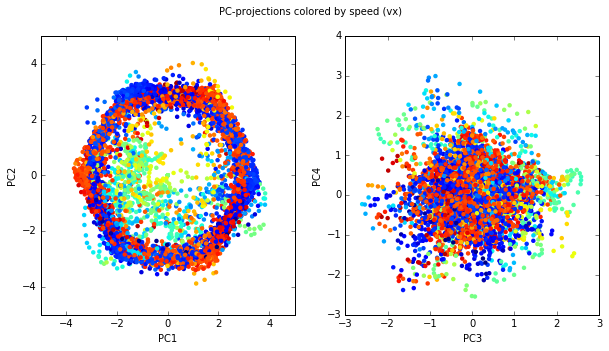

In [30]:
proj = np.dot(X,U)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))
ax1.scatter(proj[:,0],proj[:,1], c=speeds[:,1], lw=0)
ax2.scatter(proj[:,2],proj[:,3], c=speeds[:,1], lw=0)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax2.set_xlabel("PC3")
ax2.set_ylabel("PC4")
f.suptitle("PC-projections colored by speed (vx)")

Other PCs in time

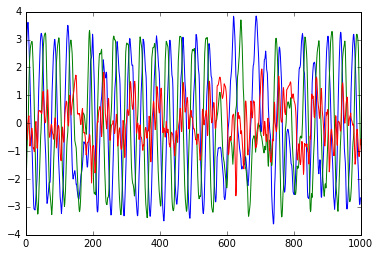

In [41]:
plt.plot(proj[1000:2000,0])
plt.plot(proj[1000:2000,1])
plt.plot(proj[1000:2000,2])

## ISOMAP (Sheet 6)

In [61]:
X.shape

(4590, 18)

In [64]:
stack=6 # tau
X2=X.reshape((-1,18*stack))

In [65]:
im = manifold.Isomap(n_neighbors=10, n_components=3).fit_transform(X2)

(-24.441216392085071,
 23.559257169272527,
 -24.838668672944706,
 23.369789106863468)

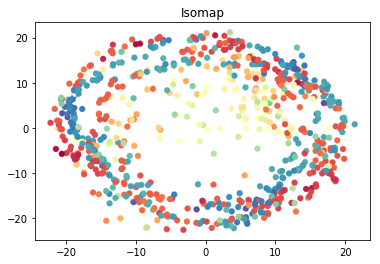

In [66]:
plt.scatter(im[:, 0], im[:, 1], c=speeds[::stack,1], cmap=plt.cm.Spectral,lw=0.2)
plt.title("Isomap")
plt.axis('tight')

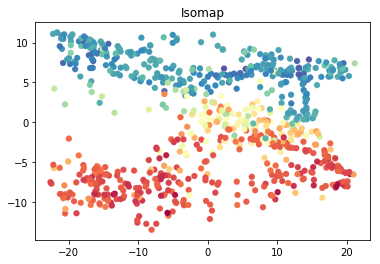

In [67]:
plt.scatter(im[:, 1], im[:, 2], c=speeds[::stack,1], cmap=plt.cm.Spectral,lw=0.2)
plt.title("Isomap")

In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [69]:
%matplotlib inline

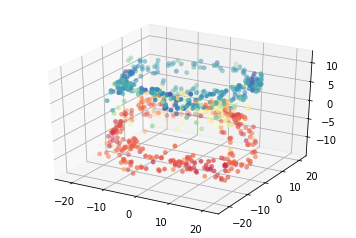

In [70]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter (im[:, 0],im[:, 1], im[:, 2], c=speeds[::stack,1], cmap=plt.cm.Spectral,lw=0.2)


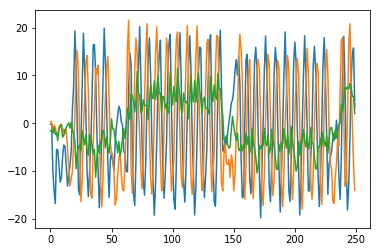

In [60]:
plt.plot(im[:250, 0])
plt.plot(im[:250, 1])
plt.plot(im[:250, 2])

## PCA on embedded space

In [55]:
l2,U2 = PCA(X2.T)

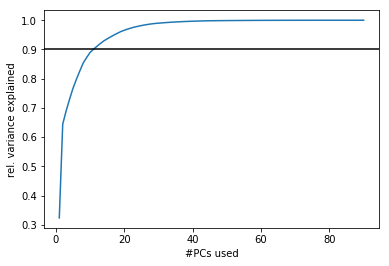

In [56]:
plt.plot(range(1,len(l2)+1),np.cumsum(l2/np.sum(l2)))
plt.axhline(y=0.9, color='k',)
plt.xlabel("#PCs used")
plt.ylabel("rel. variance explained")

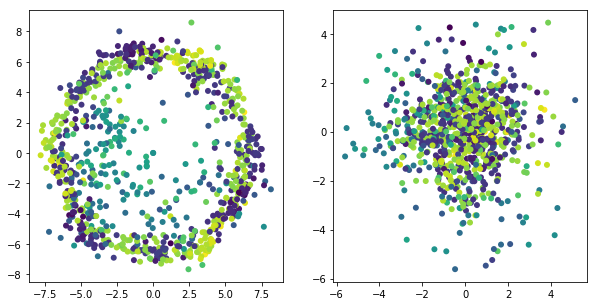

In [57]:
proj2 = np.dot(X2,U2)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(10,5))
ax1.scatter(proj2[:,0],proj2[:,1], c=speeds[::stack,1], lw=0)
ax2.scatter(proj2[:,2],proj2[:,3], c=speeds[::stack,1], lw=0)

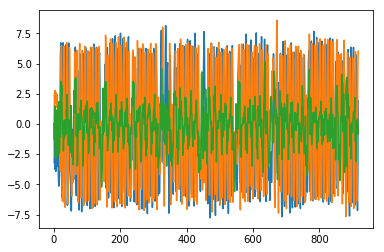

In [58]:
plt.plot(proj2[:, 0])
plt.plot(proj2[:, 1])
plt.plot(proj2[:, 2])